# Demo of the two thirds library

This notebook gives a demo of the two thirds library which can be used to analyse runnings of the two thirds library.

To install the library you can run `pip install twothirds` or get the git repository [here]().

## A basic single game

In [1]:
import twothirds 
import random

Let as assume we have the following list of random guesses:

In [2]:
N = 2000
guesses = [int(round(random.triangular(0, 100, 44), 0)) for k in range(N)]

Now we create a single game instance

In [3]:
g = twothirds.TwoThirdsGame(guesses)

Let's find the two thirds of the average:

In [4]:
g.two_thirds_of_the_average()

32.138666666666666

We can identify the winning guess:

In [5]:
g.find_winner()

32

Note that the data could also be in the form of a dictionary that maps names of players to guesses:

In [6]:
import string

def randomword(length):
    """A function to generate a random name: http://stackoverflow.com/questions/2030053/random-strings-in-python"""
    return ''.join(random.choice(string.lowercase) for i in range(length))

guesses = {randomword(8):guess for guess in guesses}

In [7]:
g = twothirds.TwoThirdsGame(guesses)

In [8]:
g.two_thirds_of_the_average()

32.138666666666666

We see that quite a few people __won__.

In [9]:
g.find_winner()

('apcocmlu',
 'bfgppznj',
 'fskeepbj',
 'hoyicrdx',
 'lfdxotfc',
 'nbgjuvxe',
 'oblsnael',
 'pzbtaiij',
 'qbfaiapu',
 'qrhjogyk',
 'sjdbhwok',
 'slhckife',
 'speebzxd',
 'svtgakna',
 'swtsqewb',
 'tlspoiml',
 'tobhuzcp',
 'unzsejfc',
 'wtxvyzub',
 'wvctyumc',
 'xhckzddc',
 'ynitorah',
 'yokuzwvt',
 'zdyludru',
 'ziepdmed',
 32)

## Handling data

Note that it might be much easier to collect the data in a spreadsheet. This library allows for that. Let's first write the data file we will be using (in effect doing things backwords).

In [10]:
import pandas
df = pandas.DataFrame(guesses.items())
df.to_csv('demo.csv', index=False)

We can now read in this data:

In [11]:
data = twothirds.Data('demo.csv')
data.read()

The data file has a dataframe attribute:

In [12]:
data.df.head()

,0,1
0,wnitrdsi,17
1,fseluvah,35
2,aehvvlcy,41
3,emgysqqy,67
4,liukbrmv,47


We can get the data in a nicer format and ready for use. The format is a list of objects representing every play of the game (so for example we could have a file with muliple columns for each game).

In [13]:
guesses = data.out()[0]

Here we create the game (as above):

In [14]:
g = twothirds.TwoThirdsGame(guesses)

In [15]:
g.find_winner()

('apcocmlu',
 'bfgppznj',
 'fskeepbj',
 'hoyicrdx',
 'lfdxotfc',
 'nbgjuvxe',
 'oblsnael',
 'pzbtaiij',
 'qbfaiapu',
 'qrhjogyk',
 'sjdbhwok',
 'slhckife',
 'speebzxd',
 'svtgakna',
 'swtsqewb',
 'tlspoiml',
 'tobhuzcp',
 'unzsejfc',
 'wtxvyzub',
 'wvctyumc',
 'xhckzddc',
 'ynitorah',
 'yokuzwvt',
 'zdyludru',
 'ziepdmed',
 32)

## Managing an activity

If we have a spreadsheet with multiple columns for guesses we can read it in and create an activity that will contain all the data and analysis we need. Let's tweak our guesses to have a second guess that should be lower than the first.

In [16]:
guesses = [[key, guesses[key], int(random.triangular(0, guesses[key], 1.0 * guesses[key] / 3))] for key in guesses]

Here we write the data to file again:

In [17]:
df = pandas.DataFrame(guesses)
df.to_csv('demo.csv', index=False)

In [18]:
activity = twothirds.Activity('demo.csv')

We have still got access to the raw data:

In [19]:
activity.raw_data.df.head()

,0,1,2
0,wnitrdsi,17,5
1,fseluvah,35,9
2,aehvvlcy,41,12
3,emgysqqy,67,10
4,liukbrmv,47,25


We also have an instance for each game:

In [20]:
activity.games

[<twothirds.single_game.TwoThirdsGame instance at 0x11242c758>,
 <twothirds.single_game.TwoThirdsGame instance at 0x11242c7a0>]

The winning guess for each game can be found below:

In [21]:
[g.find_winner()[-1] for g in activity.games]

[32, 14]

The winners of the first game:

In [22]:
activity.games[0].find_winner()[:-1]

('apcocmlu',
 'bfgppznj',
 'fskeepbj',
 'hoyicrdx',
 'lfdxotfc',
 'nbgjuvxe',
 'oblsnael',
 'pzbtaiij',
 'qbfaiapu',
 'qrhjogyk',
 'sjdbhwok',
 'slhckife',
 'speebzxd',
 'svtgakna',
 'swtsqewb',
 'tlspoiml',
 'tobhuzcp',
 'unzsejfc',
 'wtxvyzub',
 'wvctyumc',
 'xhckzddc',
 'ynitorah',
 'yokuzwvt',
 'zdyludru',
 'ziepdmed')

The winners of the second game (there are more of them):

In [23]:
activity.games[1].find_winner()[:-1]

('anpwrkmg',
 'aowzyiaj',
 'attypnzu',
 'bxfzygmx',
 'cfzztpde',
 'cgigojsl',
 'dhnkgdcy',
 'dijgosza',
 'djnksuac',
 'eaioxbyv',
 'elupbqvm',
 'estnzwiw',
 'ezzqhpyp',
 'fpfmikpz',
 'gmjmogeu',
 'gmpdalqk',
 'gotflvbl',
 'grtctspc',
 'gsmhdffh',
 'hmxqvfxe',
 'hnrulrjs',
 'ierdrwqs',
 'iquoeyac',
 'ivdtpmfw',
 'ixuosudg',
 'jeizmotx',
 'jojtxypy',
 'kdkuislt',
 'kjtmkukg',
 'ldkrgaje',
 'lfdxotfc',
 'lhudjnmm',
 'lhwzttkj',
 'mpqzosoa',
 'mrmqvnqi',
 'nsmmxemt',
 'nvefyfkr',
 'nxmiqckz',
 'oensxdhw',
 'oybhjxjr',
 'pvdwsgub',
 'qicuitcb',
 'qmxqlrik',
 'qsbmzhpi',
 'qzvpbbre',
 'reqpaoub',
 'rglbhlxg',
 'ricqusyu',
 'rrdsanuv',
 'rvyktesd',
 'rxtpejih',
 'vnmnyhwr',
 'vomeagrs',
 'vqlbbmht',
 'whweaawp',
 'wvwzyxuu',
 'wwqcsbgf',
 'xgdjurlk',
 'xxejnbfe',
 'xzdnrlmh',
 'yfrjjnup',
 'ymjoakkf',
 'ymvvfxox',
 'yokuzwvt',
 'ytlsdyhd',
 'zcscpuhj',
 'zjtfzugn')

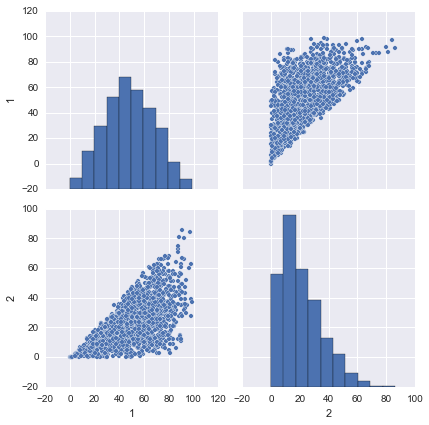

In [24]:
%matplotlib inline
activity.pairplot();

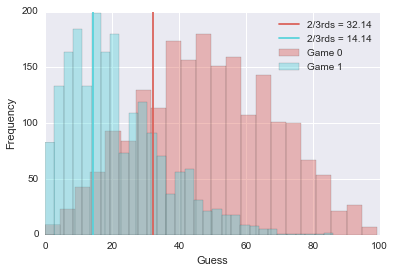

In [25]:
activity.analyse()
activity.distplot();

In [27]:
activity

Game 0
---------------------
2/3rds of the average: 32.14
Winning guess: 32
Winner(s): ('apcocmlu', 'bfgppznj', 'fskeepbj', 'hoyicrdx', 'lfdxotfc', 'nbgjuvxe', 'oblsnael', 'pzbtaiij', 'qbfaiapu', 'qrhjogyk', 'sjdbhwok', 'slhckife', 'speebzxd', 'svtgakna', 'swtsqewb', 'tlspoiml', 'tobhuzcp', 'unzsejfc', 'wtxvyzub', 'wvctyumc', 'xhckzddc', 'ynitorah', 'yokuzwvt', 'zdyludru', 'ziepdmed')
Game 1
---------------------
2/3rds of the average: 14.14
Winning guess: 14
Winner(s): ('anpwrkmg', 'aowzyiaj', 'attypnzu', 'bxfzygmx', 'cfzztpde', 'cgigojsl', 'dhnkgdcy', 'dijgosza', 'djnksuac', 'eaioxbyv', 'elupbqvm', 'estnzwiw', 'ezzqhpyp', 'fpfmikpz', 'gmjmogeu', 'gmpdalqk', 'gotflvbl', 'grtctspc', 'gsmhdffh', 'hmxqvfxe', 'hnrulrjs', 'ierdrwqs', 'iquoeyac', 'ivdtpmfw', 'ixuosudg', 'jeizmotx', 'jojtxypy', 'kdkuislt', 'kjtmkukg', 'ldkrgaje', 'lfdxotfc', 'lhudjnmm', 'lhwzttkj', 'mpqzosoa', 'mrmqvnqi', 'nsmmxemt', 'nvefyfkr', 'nxmiqckz', 'oensxdhw', 'oybhjxjr', 'pvdwsgub', 'qicuitcb', 'qmxqlrik', 'qsbmzhp